In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('/content/sample_data/house-votes-84.csv')


In [ ]:
dataset.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [ ]:
dataset=dataset.rename(columns={'Class Name':'party'})

In [ ]:
dataset.shape

(435, 17)

In [ ]:
dataset.columns


Index(['party', ' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa'],
      dtype='object')

In [ ]:
rawdataset=dataset
party={'republican':0,'democrat':1}
vote={'y':1,'n':0,'?':1}
for col in dataset.columns:
  if col !='party':
    dataset[col]=dataset[col].map(vote)
dataset['party']=dataset['party'].map(party)


In [ ]:
rawdataset.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


In [ ]:
x=dataset.iloc[:, 1:17].values
y=dataset.iloc[:, 0].values
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
for train_index,test_index in kf.split(x,y):
  x_train,x_test=x[train_index],x[test_index]
  y_train,y_test=y[train_index],y[test_index]

In [ ]:
x_train.shape,x_test.shape

((348, 16), (87, 16))

In [ ]:
!pip install classic-ID3-DecisionTree

In [ ]:
from classic_ID3_decision_tree import DecisionTreeClassifier
id3=DecisionTreeClassifier()
id3.add_features(dataset,'party')
print(id3.add_features)
id3.gini_index(x_train,y_train)
y_pred=id3.predict(x_test)

<bound method DecisionTreeClassifier.add_features of <classic_ID3_decision_tree.DecisionTreeClassifier object at 0x7b73ebb62110>>


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
len(y_pred)

87

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
formatted_accuracy="{:.2f}".format(100*accuracy)
print(f'Accuracy:{formatted_accuracy}')

Accuracy:78.16


[Text(0.5, 0.8333333333333334, ' adoption-of-the-budget-resolution <= 0.5\ngini = 0.474\nsamples = 348\nvalue = [134, 214]'),
 Text(0.25, 0.5, ' water-project-cost-sharing <= 0.5\ngini = 0.019\nsamples = 204\nvalue = [2, 202]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 185\nvalue = [0, 185]'),
 Text(0.75, 0.5, ' water-project-cost-sharing <= 0.5\ngini = 0.153\nsamples = 144\nvalue = [132, 12]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.034\nsamples = 117\nvalue = [115, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.466\nsamples = 27\nvalue = [17, 10]')]

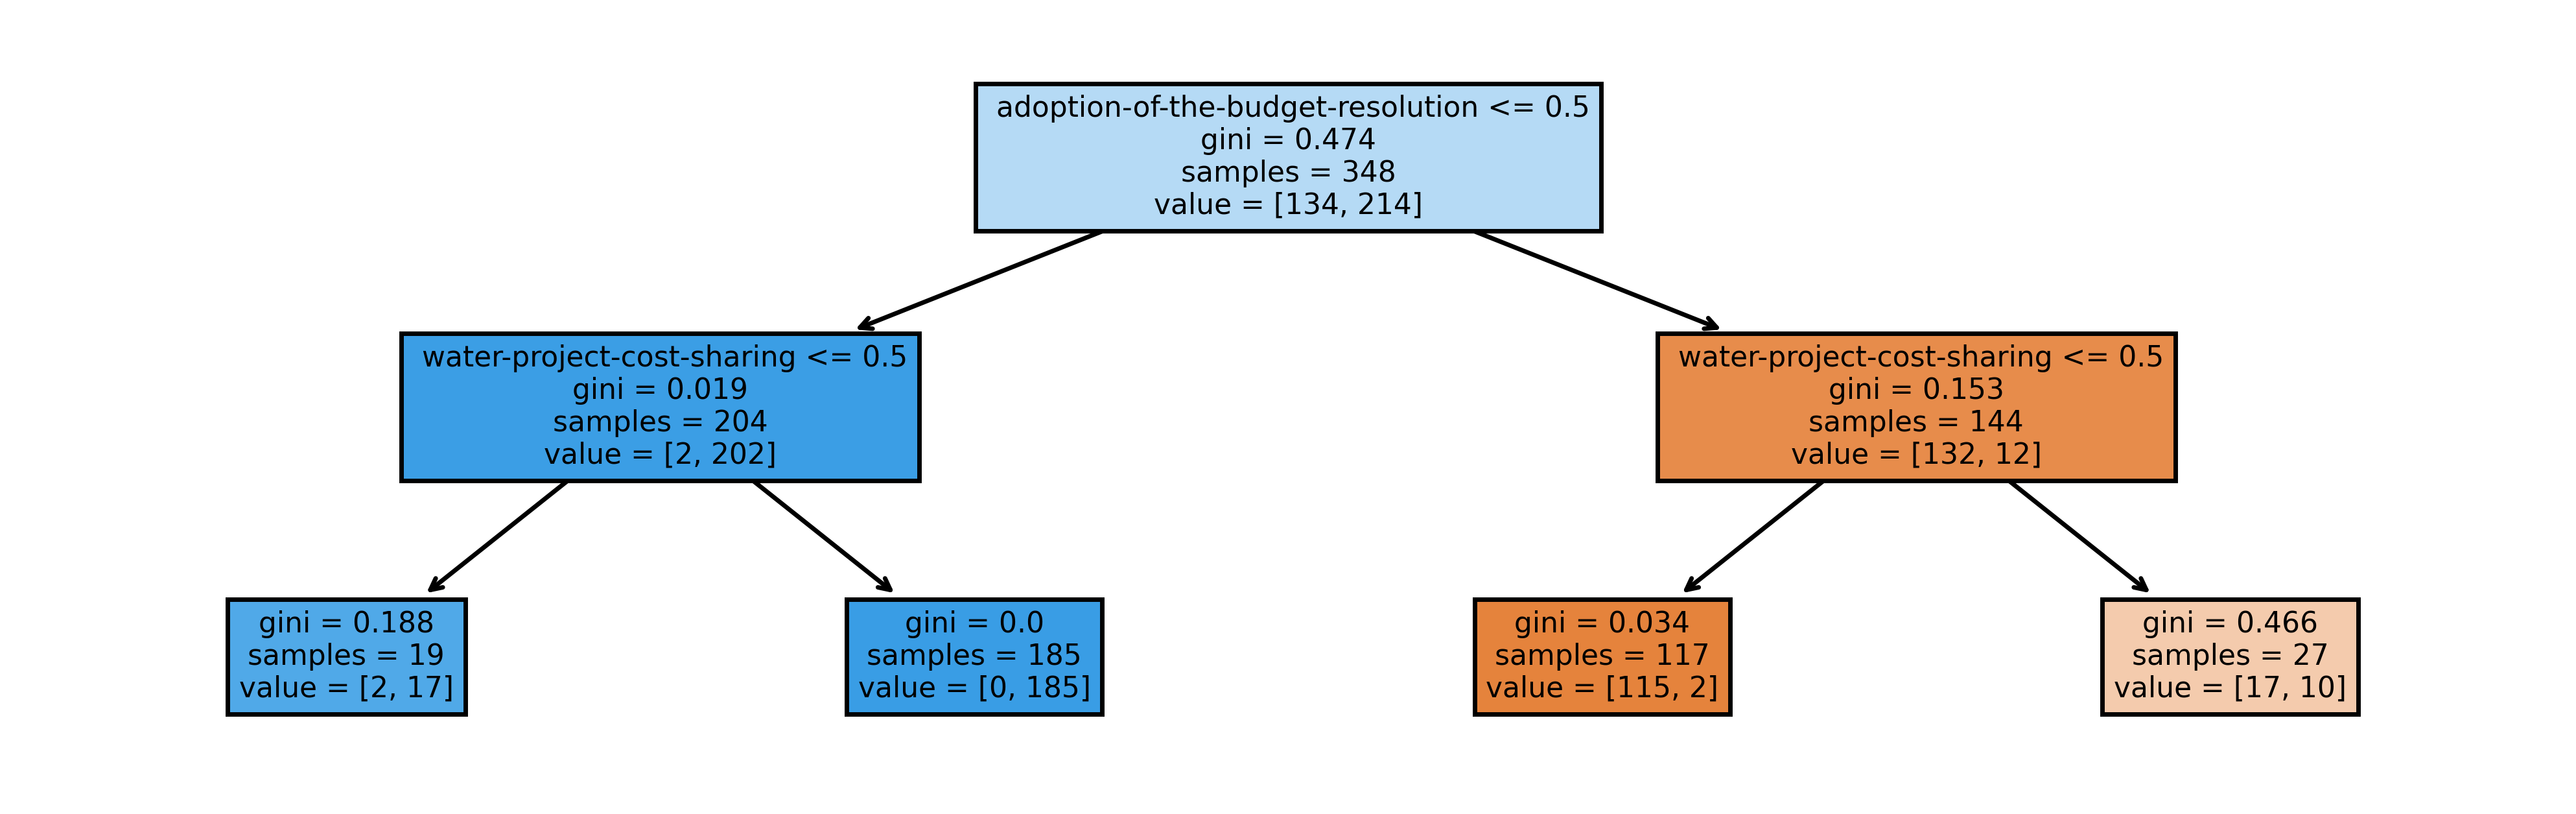

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(10,3),dpi=500)
model = DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)
plot_tree(model,feature_names=dataset.columns,filled=True)